In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get and clean latest data
cases_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
cases = cases_csv.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
deaths = deaths_csv.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

In [3]:
# Calculate x and y axes
countries_total_cases = np.empty([len(cases.index), cases.columns.size], dtype=int)
countries_last_week_new = np.empty([len(cases.index), cases.columns.size], dtype=int)
for i in range(len(cases.index)):
    total_confirmed_cases = cases.iloc[i].copy().to_numpy()
    last_week_cases = np.empty(total_confirmed_cases.size)
    last_week_case = total_confirmed_cases[0]
    for j in range(len(total_confirmed_cases)):
        if j > 7:
            last_week_case = total_confirmed_cases[j] - total_confirmed_cases[j - 7]
        last_week_cases[j] = last_week_case
    countries_total_cases[i] = total_confirmed_cases
    countries_last_week_new[i] = last_week_cases
countries_total_deaths = np.empty([len(cases.index), cases.columns.size], dtype=int)
countries_last_week_deaths = np.empty([len(cases.index), cases.columns.size], dtype=int)
for i in range(len(deaths.index)):
    total_deaths = deaths.iloc[i].copy().to_numpy()
    last_week_deaths = np.empty(total_deaths.size)
    last_week_death = total_deaths[0]
    for j in range(len(total_confirmed_cases)):
        if j > 7:
            last_week_death = total_deaths[j] - total_deaths[j - 7]
        last_week_deaths[j] = last_week_death
    countries_total_deaths[i] = total_deaths
    countries_last_week_deaths[i] = last_week_deaths

In [4]:
# User Input
country_to_plot = 'India'
arr = cases_csv['Country/Region'] == country_to_plot
val = arr[arr == True]
if (val.empty):
    print("Country Not Found.")
else:
    country_index = val.index[0]

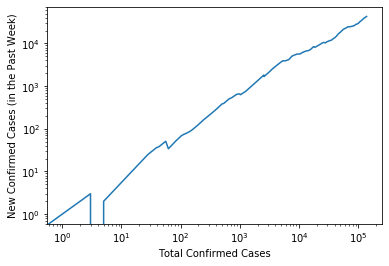

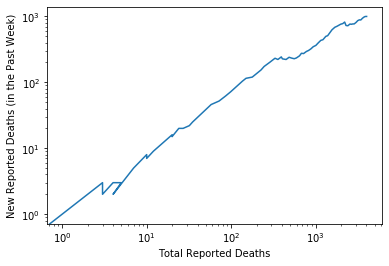

In [5]:
# Plotting
plt.plot(countries_total_cases[country_index], countries_last_week_new[country_index])
plt.xlabel('Total Confirmed Cases')
plt.ylabel('New Confirmed Cases (in the Past Week)')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.plot(countries_total_deaths[country_index], countries_last_week_deaths[country_index])
plt.xlabel('Total Reported Deaths')
plt.ylabel('New Reported Deaths (in the Past Week)')
plt.xscale('log')
plt.yscale('log')
plt.show()